# Travelling salesman problem - To find the shortest roads that connects a set of cities

In [1]:
#import libraries
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data\n
- node1 & node2: names of the nodes connected.\n,
- trail: edge attribute indicating the abbreviated name of the trail for each edge. For example: rs = red square\n,
- distance: edge attribute indicating trail length in miles.\n,
- color: trail color used for plotting.\n,
- estimate: edge attribute indicating whether the edge distance is estimated from eyeballing the trailmap (1=yes, 0=no) as some distances are not provided. This is solely for reference; it is not used for analysis.


In [4]:
#load data
edgelist = pd.read_csv('https://gist.githubusercontent.com/brooksandrew/e570c38bcc72a8d102422f2af836513b/raw/89c76b2563dbc0e88384719a35cba0dfc04cd522/edgelist_sleeping_giant.csv')

print(edgelist)

               node1            node2   trail  distance        color  estimate
0       rs_end_north             v_rs      rs      0.30          red         0
1               v_rs             b_rs      rs      0.21          red         0
2               b_rs             g_rs      rs      0.11          red         0
3               g_rs             w_rs      rs      0.18          red         0
4               w_rs             o_rs      rs      0.21          red         0
5               o_rs             y_rs      rs      0.12          red         0
6               y_rs     rs_end_south      rs      0.39          red         0
7       rc_end_north             v_rc      rc      0.70          red         0
8               v_rc             b_rc      rc      0.04          red         0
9               b_rc             g_rc      rc      0.15          red         0
10              g_rc             o_rc      rc      0.13          red         0
11              o_rc             w_rc      rc      0

## Create Graph

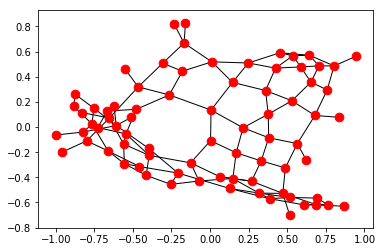

In [11]:
#graph
g = nx.Graph()

# Add edges and edge attributes
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1], attr_dict=elrow[2:].to_dict())

# draw the network 
nx.draw_networkx(g,node_color='r', node_size=75, with_labels=False)

## Question 1: Write a line of code that shows if "o_tt" is reachable from "w_gy2" ?

In [23]:
#get all simple paths between two nodes
paths = nx.all_simple_paths(g, source='o_tt', target='w_gy2',cutoff=10)
pathList = list(paths)
print(pathList[0:3],'\n')
print('Total simple paths between o_tt and w_gy2:',len(pathList))
print('Yes, there are 323 simple paths between o_tt and w_gy2, therefore, o_tt is reachable from w_gy2')

[['o_tt', 'o_w_1', 'g_w', 'g_rt', 'g_gy1', 'g_rc', 'o_rc', 'o_w_2', 'w_rs', 'b_w', 'w_gy2'], ['o_tt', 'o_w_1', 'g_w', 'g_rt', 'g_gy1', 'g_rc', 'g_rs', 'b_rs', 'b_g', 'b_w', 'w_gy2'], ['o_tt', 'o_w_1', 'g_w', 'g_rt', 'g_gy1', 'g_rc', 'g_rs', 'b_rs', 'b_g', 'g_gy2', 'w_gy2']] 

Total simple paths between o_tt and w_gy2: 323
Yes, there are 323 simple paths between o_tt and w_gy2, therefore, o_tt is reachable from w_gy2


## Question 2: Write a line of code that shows the shortest path between "o_tt" and "w_gy2"?

In [27]:
#get shortest path between two nodes
print(nx.shortest_path(g,source='o_tt',target='w_gy2'))
#print(nx.shortest_path(g,source='w_gy2',target='o_tt')) #reverse

['o_tt', 'o_w_1', 'o_gy1', 'o_rc', 'o_w_2', 'w_rs', 'b_w', 'w_gy2']


## Question 3: Write a line of code that shows the minimum edges that disconnects the graph?

In [29]:
#get bridges
list(nx.bridges(g))

#get length of list
print('Number of edges that would disconnect the graph:',len(list(nx.bridges(g))))


Number of edges that would disconnect the graph: 13
